In [ ]:
import pandas as pd

# Definiamo i nomi delle colonne
column_names = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
    'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]

df = pd.read_csv('wdbc.data', header=None, names=column_names)


In [4]:
print('Informazioni generali sul dataset:')
df.info()

Informazioni generali sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    floa

In [5]:
# Visualizzamo alcune informazioni sul dataset

print('Numero di righe e colonne nel dataset:', df.shape)

Numero di righe e colonne nel dataset: (569, 32)


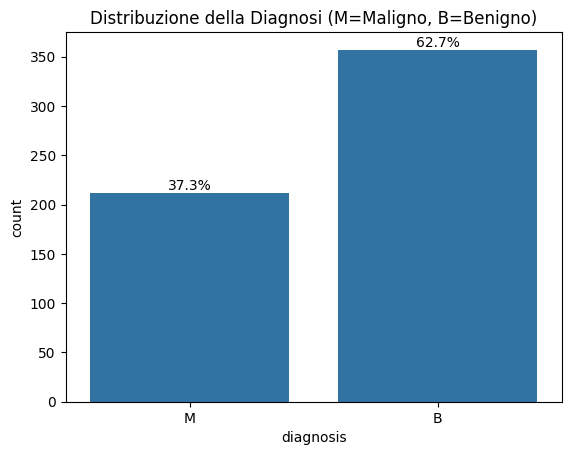

Conteggio della diagnosi:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentuale della diagnosi:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creiamo un count plot per visualizzare la distribuzione della diagnosi
ax = sns.countplot(x='diagnosis', data=df)
plt.title('Distribuzione della Diagnosi (M=Maligno, B=Benigno)')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

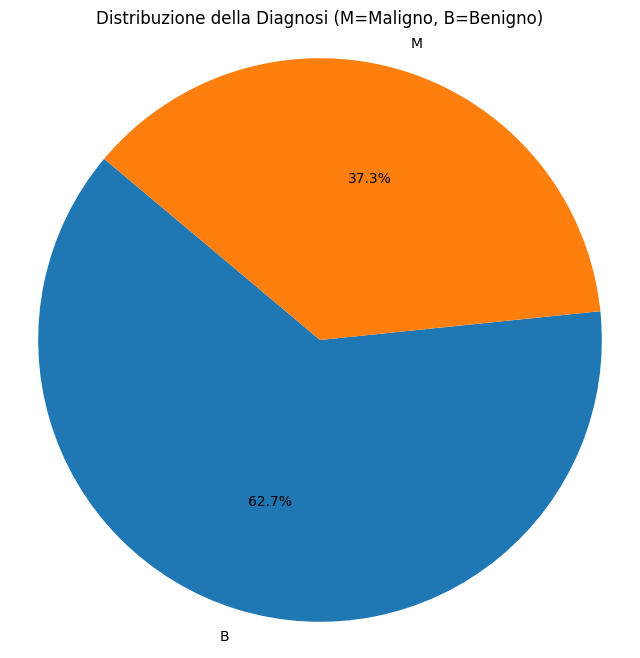

In [7]:
# Calcoliamo i conteggi per la colonna 'diagnosis'
diagnosis_counts = df['diagnosis'].value_counts()

# Creiamo il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione della Diagnosi (M=Maligno, B=Benigno)')
plt.axis('equal')  # Assicura che il grafico a torta sia un cerchio.
plt.show()

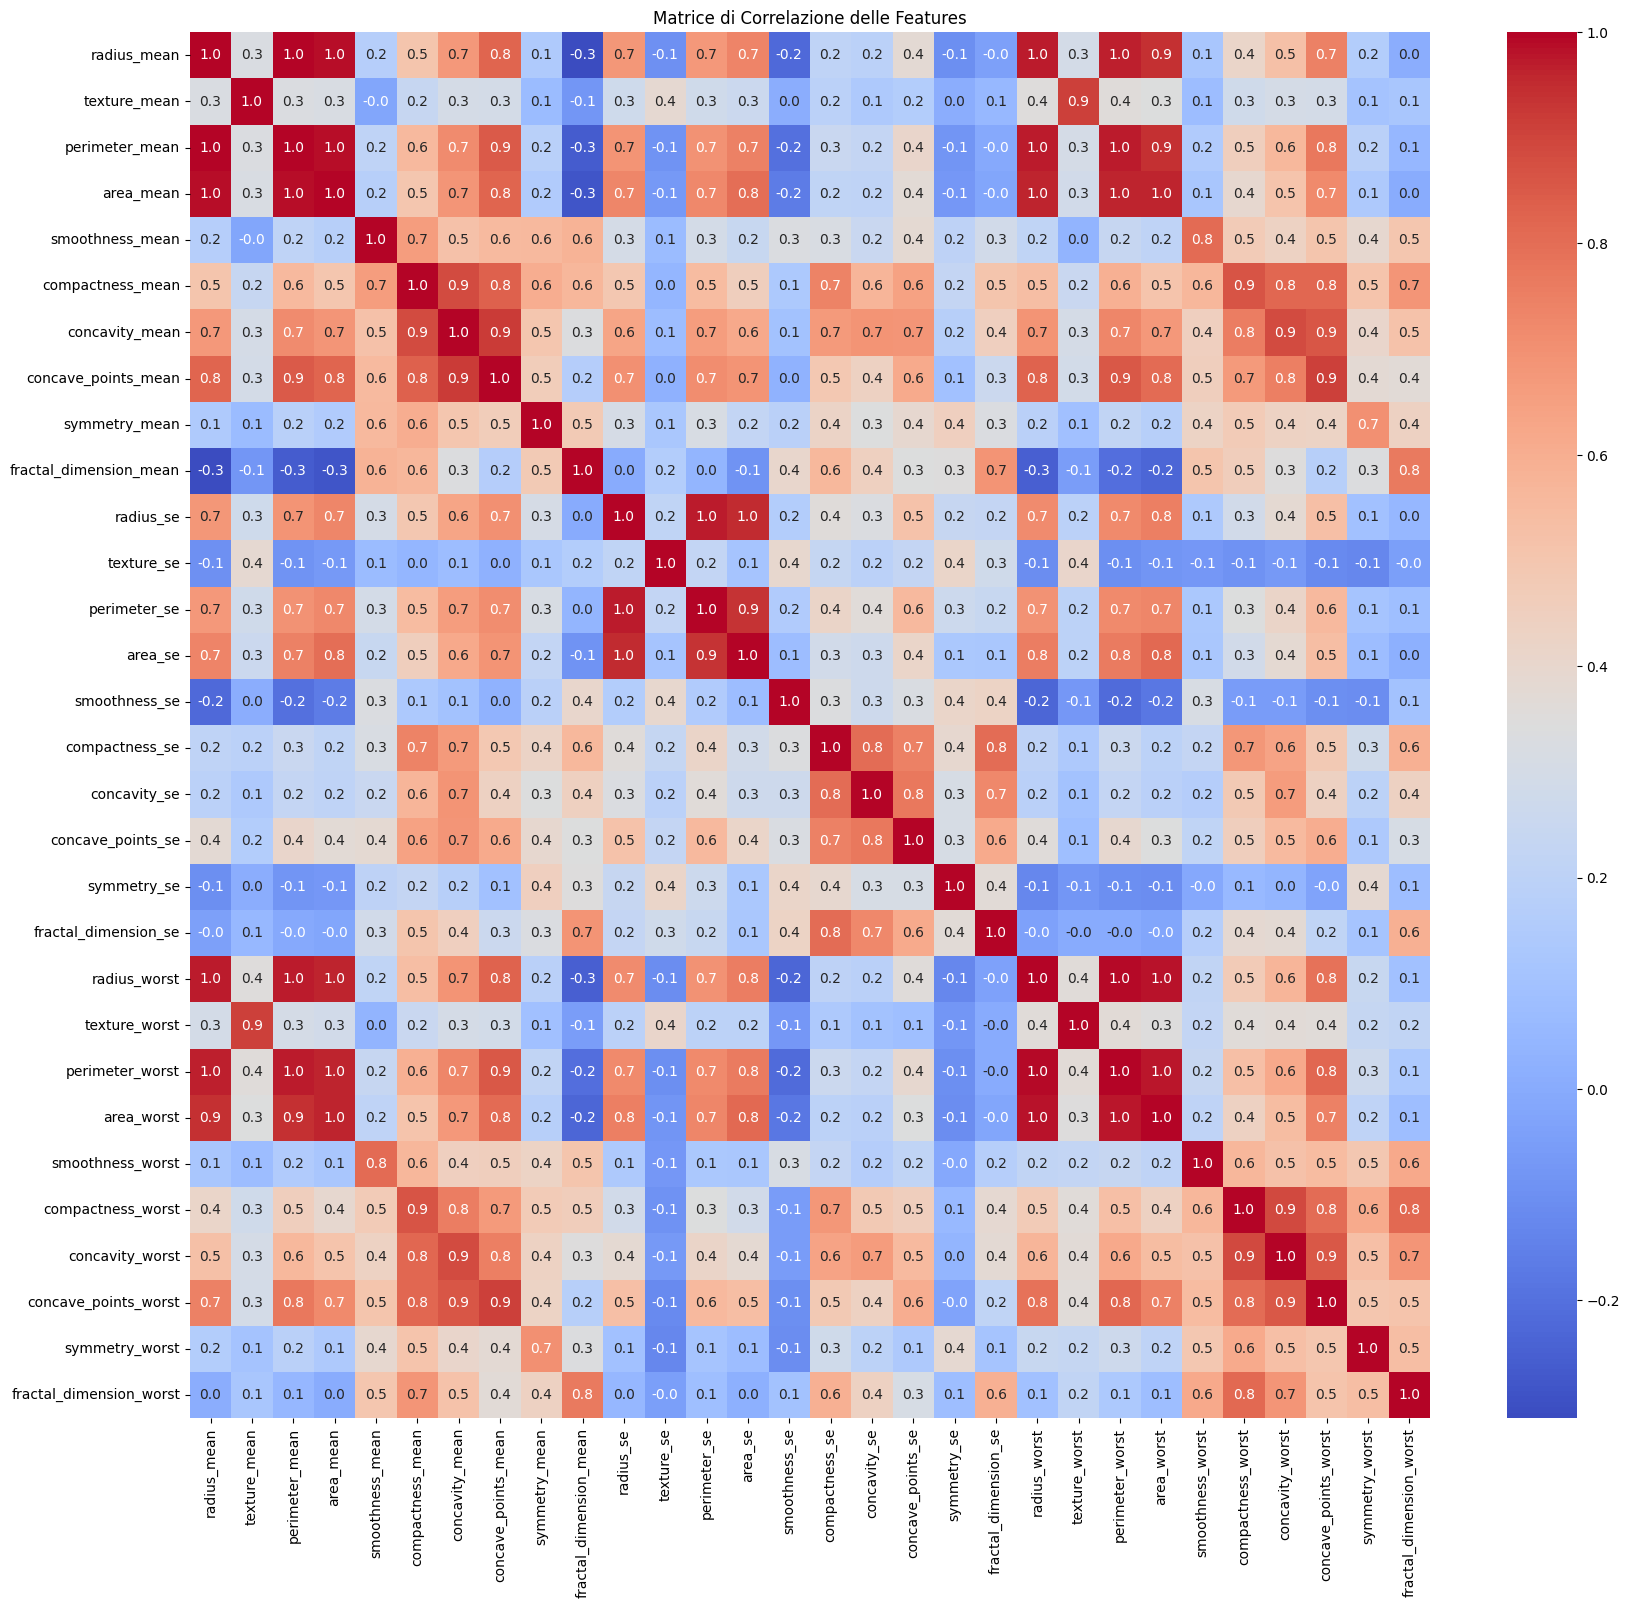

In [9]:
# Calcoliamo la matrice di correlazione
# Escludiamo la colonna 'id' che non è una feature utile per la correlazione
corr_matrix = df.drop('id', axis=1).corr(numeric_only=True)

# Creiamo la heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Matrice di Correlazione delle Features')
plt.show()